# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.
Our target accuracy is 70%, but any accuracy over 50% is a great start.
Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
## YOUR CODE HERE ##
train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomCrop(224), 
                                       transforms.Resize(255),
                                       transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])
                                      ])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])
                                      ])
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_set = torchvision.datasets.CIFAR10('CIFAR10_data/', download=True, train=True, 
                                          transform=train_transforms)
test_set = torchvision.datasets.CIFAR10('CIFAR10_data/', download=True, train=False, 
                                          transform=test_transforms)

# Create test set and define test dataloader
## YOUR CODE HERE ##
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)
# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        plt.imshow(image.T)
        plt.show()

In [5]:
# Explore data
## YOUR CODE HERE ##
print('Number of images in the training set:', len(train_set))
print('Number of images in the test set:', len(test_set))
print('Total number of images in the CIFAR-10 dataset:', len(train_set)+len(test_set))


Number of images in the training set: 50000
Number of images in the test set: 10000
Total number of images in the CIFAR-10 dataset: 60000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cat


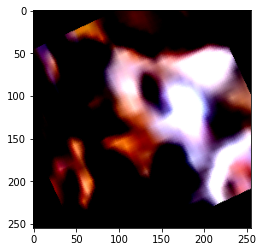

plane


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


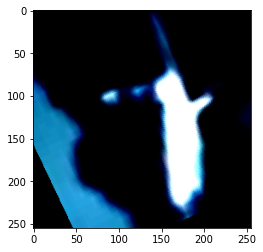

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship


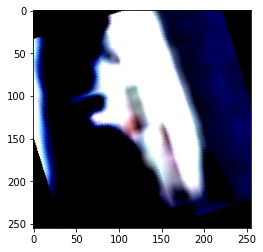

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


horse


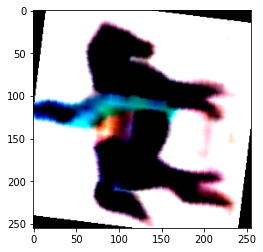

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


deer


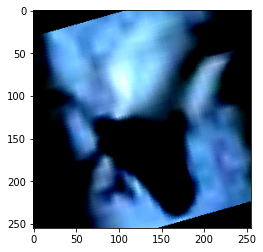

In [6]:
show5(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane


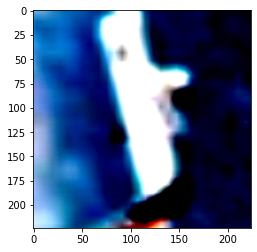

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


deer


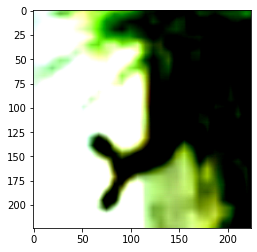

car


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


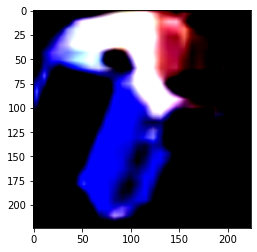

deer


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


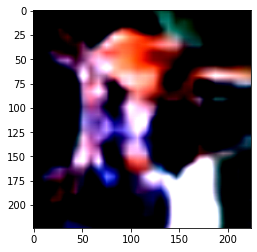

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship


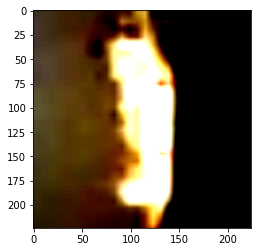

In [7]:
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [8]:
## YOUR CODE HERE ##
#importing pretrained 
from torchvision import models

model = models.resnet50(pretrained=True)
model

C:\Users\Bartosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Bartosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Specify a loss function and an optimizer, and instantiate the model.

This layer takes in **2048** features as input and returns **1000** classes as output
By using our own **Network** we can get output of 10

In [9]:
## YOUR CODE HERE ##
class Network(nn.Module):      
    def __init__(self):
        super().__init__()
        
        #defining the layers of the fully connected Network
        
        self.input = nn.Linear(2048, 1024)   
        self.hidden1 = nn.Linear(1024, 512)
        self.hidden2 = nn.Linear(512,256) 
        self.output = nn.Linear(256, 10)    
        
        self.dropout = nn.Dropout(p = 0.1)  #defining dropout 
    
    def forward(self, x):
        
        x = x.view(x.shape[0], -1) #flattening the input
        
        #defining a forward pass
        
        x = self.dropout(F.relu(self.input(x)))
        x = self.dropout(F.relu(self.hidden1(x)))
        x = self.dropout(F.relu(self.hidden2(x)))
        
        x = F.log_softmax(self.output(x), dim = 1)  #no dropout on the output layer

        return x

In [10]:
model.fc = Network() 
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
# device = torch.device('cuda'if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')
print('Running on', device)
model.to(device)

Running on cuda


AssertionError: Torch not compiled with CUDA enabled

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [ ]:
## YOUR CODE HERE ##
epochs = 3
steps = 0
running_loss = 0
print_every = 500
train_losses, test_losses, accuracy_list = [], [], []

for epoch in range(epochs):
    for images, labels in train_loader:
        steps += 1
        
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()                      
        optimizer.step()   
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            
            model.eval()
            test_loss = 0
            accuracy = 0
            
            for images, labels in test_loader:
                
                images, labels = images.to(device), labels.to(device)
                output_test = model.forward(images)
                batch_loss = criterion(output_test, labels)
                test_loss += batch_loss.item()
                
                #calculating accuracy
                ps =torch.exp(output_test)
                top_p, top_class = ps.topk(1, dim=1)
                
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                
            print(f"Epoch {epoch+1}/{epochs}.. \n"
                  f"Train loss: {running_loss/print_every:.3f}.. \n"
                  f"Test loss: {test_loss/len(test_loader):.3f}.. \n"
                  f"Test accuracy: {accuracy/len(test_loader):.3f}\n")
            
            running_loss = 0
            model.train()
            
            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(test_loader))
            accuracy_list.append(accuracy/len(test_loader))    
                
        

Epoch 1/3.. 
Train loss: 1.342.. 
Test loss: 1.167.. 
Test accuracy: 0.559

Epoch 1/3.. 
Train loss: 1.489.. 
Test loss: 1.171.. 
Test accuracy: 0.556

Epoch 1/3.. 
Train loss: 1.496.. 
Test loss: 1.030.. 
Test accuracy: 0.619

Epoch 1/3.. 
Train loss: 1.418.. 
Test loss: 1.026.. 
Test accuracy: 0.630

Epoch 1/3.. 
Train loss: 1.424.. 
Test loss: 1.087.. 
Test accuracy: 0.580

Epoch 1/3.. 
Train loss: 1.404.. 
Test loss: 0.988.. 
Test accuracy: 0.624

Epoch 1/3.. 
Train loss: 1.421.. 
Test loss: 1.030.. 
Test accuracy: 0.616

Epoch 2/3.. 
Train loss: 1.399.. 
Test loss: 1.013.. 
Test accuracy: 0.623

Epoch 2/3.. 
Train loss: 1.348.. 
Test loss: 0.996.. 
Test accuracy: 0.624

Epoch 2/3.. 
Train loss: 1.373.. 
Test loss: 0.965.. 
Test accuracy: 0.647

Epoch 2/3.. 
Train loss: 1.383.. 
Test loss: 0.939.. 
Test accuracy: 0.652

Epoch 2/3.. 
Train loss: 1.390.. 
Test loss: 0.999.. 
Test accuracy: 0.626

Epoch 2/3.. 
Train loss: 1.360.. 
Test loss: 1.094.. 
Test accuracy: 0.588

Epoch 2/3.. 

Plot the training loss (and validation loss/accuracy, if recorded).

NameError: name 'train_losses' is not defined

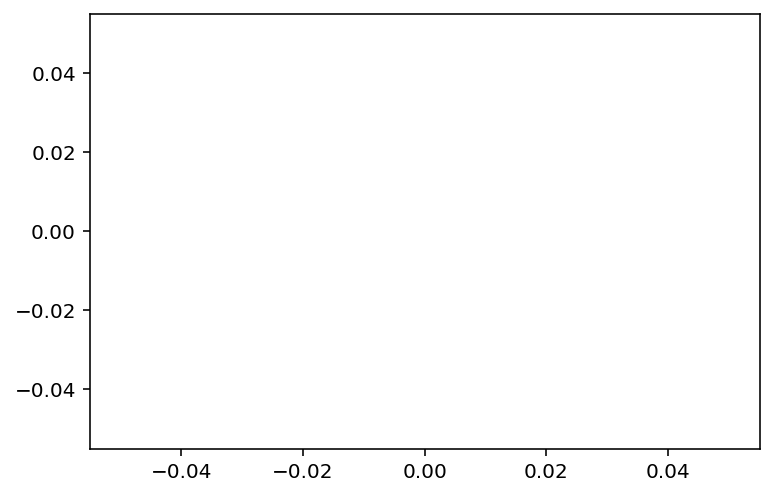

In [1]:
## YOUR CODE HERE ##
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(figsize = [8,5])
plt.plot(train_losses, label= 'training loss')
plt.plot(test_loss, label= 'test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(frameon=False)
plt.show()



In [ ]:
plt.plot(figsize = [8,5])
plt.plot(accuracy, label= 'accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(frameon=False)
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.



**Double click this cell to modify it**

